In [ ]:
#Import Library
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
#Import Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

In [ ]:
#Standarisasi Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Ubah Bentuk Data dengan encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [ ]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

#  **1. Perceptron**

In [ ]:
#Membuat Fungsi Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
#Membuat Fungsi Sigmoid Derivative
def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
input_size = X_train.shape[1]  # Menentukan ukuran input berdasarkan jumlah fitur pada data latih
output_size = 3  # Menentukan ukuran output (jumlah kelas)
learning_rate = 0.01  # Menentukan nilai learning rate untuk pembelajaran
perceptron_acc = []  # Membuat list kosong untuk menyimpan akurasi model Perceptron
perceptron_epochs_logged = []  # Membuat list kosong untuk mencatat epoch yang dilog


In [ ]:
# Tetapkan seed random untuk memastikan hasil yang dapat direproduksi
np.random.seed(1) 

# Inisialisasi bobot secara acak dengan nilai dalam rentang [-1, 1]
w = 2 * np.random.random((input_size, output_size)) - 1  # Initialize weights randomly with values in range [-1, 1]

# Inisialisasi bias dengan nilai nol
b = np.zeros((1, output_size))  # Initialize biases with zeros

In [149]:
for epoch in range(5000):
    # Forward propagation
    z = np.dot(X_train, w) + b
    a = sigmoid(z)

    # Compute loss (mean squared error)
    loss = np.mean(np.square(y_train - a))

    # Backward propagation
    error = y_train - a
    delta = error * sigmoid_derivative(a)

    # Update weights and biases
    w += learning_rate * np.dot(X_train.T, delta)
    b += learning_rate * np.sum(delta, axis=0, keepdims=True)

    if epoch % 100 == 0:
        acc = np.mean(np.argmax(a, axis=1) == np.argmax(y_train, axis=1))
        perceptron_acc.append(acc)
        perceptron_epochs_logged.append(epoch)
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(error)):.4f}, Accuracy: {acc * 100:.2f}%")


Epoch 0, Loss: 0.4757, Accuracy: 45.00%
Epoch 100, Loss: 0.1991, Accuracy: 88.33%
Epoch 200, Loss: 0.1816, Accuracy: 90.00%
Epoch 300, Loss: 0.1728, Accuracy: 91.67%
Epoch 400, Loss: 0.1672, Accuracy: 93.33%
Epoch 500, Loss: 0.1631, Accuracy: 93.33%
Epoch 600, Loss: 0.1600, Accuracy: 93.33%
Epoch 700, Loss: 0.1575, Accuracy: 93.33%
Epoch 800, Loss: 0.1555, Accuracy: 93.33%
Epoch 900, Loss: 0.1538, Accuracy: 93.33%
Epoch 1000, Loss: 0.1523, Accuracy: 93.33%
Epoch 1100, Loss: 0.1510, Accuracy: 93.33%
Epoch 1200, Loss: 0.1499, Accuracy: 93.33%
Epoch 1300, Loss: 0.1489, Accuracy: 93.33%
Epoch 1400, Loss: 0.1480, Accuracy: 94.17%
Epoch 1500, Loss: 0.1472, Accuracy: 95.00%
Epoch 1600, Loss: 0.1464, Accuracy: 95.00%
Epoch 1700, Loss: 0.1458, Accuracy: 95.00%
Epoch 1800, Loss: 0.1451, Accuracy: 95.00%
Epoch 1900, Loss: 0.1445, Accuracy: 95.00%
Epoch 2000, Loss: 0.1440, Accuracy: 95.00%
Epoch 2100, Loss: 0.1435, Accuracy: 95.00%
Epoch 2200, Loss: 0.1430, Accuracy: 95.00%
Epoch 2300, Loss: 0.142

In [ ]:
# Menghitung nilai z untuk data uji dengan menggunakan bobot (w) dan bias (b)
z_test = np.dot(X_test, w) + b

# Menerapkan fungsi aktivasi sigmoid pada hasil z
a_test = sigmoid(z_test)

# Mengambil indeks dengan nilai probabilitas tertinggi sebagai prediksi kelas
y_pred = np.argmax(a_test, axis=1)

# Mengambil label asli dari data uji (jika one-hot encoded, ambil indeks kelas sebenarnya)
y_true = np.argmax(y_test, axis=1)

# Menghitung akurasi dengan membandingkan prediksi dan label sebenarnya
accuracy = np.mean(y_pred == y_true)

# Menampilkan akurasi dalam format persentase dengan dua angka di belakang koma
print(f"Akurasi Perceptron: {accuracy * 100:.2f}%")


Akurasi Perceptron: 96.67%


# **2. Shallow Neural Network**

In [ ]:
# Menetapkan seed untuk generator bilangan acak agar hasilnya konsisten/reproducible
np.random.seed(2)

# Menentukan jumlah neuron pada lapisan tersembunyi (hidden layer)
hidden_size = 6

# Membuat list kosong untuk menyimpan akurasi model SNN pada setiap epoch
snn_acc_list = []

# Membuat list kosong untuk mencatat epoch saat akurasi dicatat/logging dilakukan
snn_epochs_logged = []


In [ ]:
# Inisialisasi bobot untuk lapisan pertama (input ke hidden), nilai acak antara -1 dan 1
w1 = 2 * np.random.rand(input_size, hidden_size) - 1

# Inisialisasi bias untuk lapisan pertama dengan nilai nol
b1 = np.zeros((1, hidden_size))

# Inisialisasi bobot untuk lapisan kedua (hidden ke output), nilai acak antara -1 dan 1
w2 = 2 * np.random.rand(hidden_size, output_size) - 1

# Inisialisasi bias untuk lapisan kedua dengan nilai nol
b2 = np.zeros((1, output_size))


In [ ]:
for epoch in range(5000):
    # Forward propagation
    # Menghitung input untuk lapisan tersembunyi
    z1 = np.dot(X_train, w1) + b1
    # Menerapkan fungsi aktivasi sigmoid pada lapisan tersembunyi
    a1 = sigmoid(z1)
    # Menghitung input untuk lapisan output
    z2 = np.dot(a1, w2) + b2
    # Menerapkan fungsi aktivasi sigmoid pada lapisan output
    a2 = sigmoid(z2)

    # Menghitung error antara label sebenarnya dan prediksi
    error = y_train - a2
    # Menghitung turunan dari error terhadap output (lapisan kedua)
    dA2 = error * sigmoid_derivative(a2)
    # Gradien bobot dan bias untuk lapisan kedua (output)
    dW2 = np.dot(a1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    # Backpropagation ke lapisan pertama (hidden)
    dA1 = np.dot(dA2, w2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X_train.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    # Update bobot dan bias dengan gradient descent
    w2 += learning_rate * dW2
    b2 += learning_rate * db2
    w1 += learning_rate * dW1
    b1 += learning_rate * db1

    # Setiap 100 epoch, hitung dan simpan akurasi serta cetak hasilnya
    if epoch % 100 == 0:
        snn_acc = np.mean(np.argmax(a2, axis=1) == np.argmax(y_train, axis=1))
        snn_acc_list.append(snn_acc)
        snn_epochs_logged.append(epoch)
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(error)):.4f}, Accuracy: {snn_acc * 100:.2f}%")


In [ ]:
# Forward propagation pada data uji
# Menghitung input untuk lapisan tersembunyi dari data uji
Z1_test = np.dot(X_test, w1) + b1

# Menerapkan fungsi aktivasi sigmoid pada lapisan tersembunyi (data uji)
A1_test = sigmoid(Z1_test)

# Menghitung input untuk lapisan output dari data uji
Z2_test = np.dot(A1_test, w2) + b2

# Menerapkan fungsi aktivasi sigmoid pada lapisan output (data uji)
A2_test = sigmoid(Z2_test)


In [ ]:
# Mengambil indeks dengan nilai probabilitas tertinggi dari output sebagai prediksi kelas
y_pred = np.argmax(A2_test, axis=1)

# Mengambil label sebenarnya dari data uji (diasumsikan one-hot encoded)
y_true = np.argmax(y_test, axis=1)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi dan label sebenarnya
accuracy = np.mean(y_pred == y_true)

# Menampilkan akurasi akhir dari model Shallow Neural Network
print(f"Akurasi Shallow Neural Network: {accuracy * 100:.2f}%")


Akurasi Shallow Neural Network: 100.00%


# **3. MultiLayer Perception (MLP)**

In [ ]:
# Menetapkan seed agar hasil acak tetap konsisten setiap kali program dijalankan
np.random.seed(2)

# Menentukan jumlah neuron pada hidden layer pertama
hidden1 = 6

# Menentukan jumlah neuron pada hidden layer kedua
hidden2 = 4

# List kosong untuk menyimpan akurasi model MLP pada setiap epoch
mlp_acc_list = []

# List kosong untuk mencatat epoch saat akurasi dicatat
mlp_epochs_logged = []


In [ ]:
# Inisialisasi bobot untuk layer pertama (input → hidden1), dengan nilai acak antara -1 dan 1
W1 = 2 * np.random.rand(input_size, hidden1) - 1

# Inisialisasi bias untuk layer pertama dengan nilai nol
b1 = np.zeros((1, hidden1))

# Inisialisasi bobot untuk layer kedua (hidden1 → hidden2), dengan nilai acak antara -1 dan 1
W2 = 2 * np.random.rand(hidden1, hidden2) - 1

# Inisialisasi bias untuk layer kedua dengan nilai nol
b2 = np.zeros((1, hidden2))

# Inisialisasi bobot untuk layer ketiga (hidden2 → output), dengan nilai acak antara -1 dan 1
W3 = 2 * np.random.rand(hidden2, output_size) - 1

# Inisialisasi bias untuk layer ketiga dengan nilai nol
b3 = np.zeros((1, output_size))


In [ ]:
for epoch in range(5000):
    # ====== Forward Propagation ======
    # Input ke hidden layer 1
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)

    # Hidden layer 1 ke hidden layer 2
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Hidden layer 2 ke output layer
    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)  # Output akhir dari MLP

    # ====== Backward Propagation ======
    # Menghitung error antara label sebenarnya dan output
    error = y_train - A3

    # Gradien untuk output layer
    dA3 = error * sigmoid_derivative(A3)
    dW3 = np.dot(A2.T, dA3)
    db3 = np.sum(dA3, axis=0, keepdims=True)

    # Gradien untuk hidden layer kedua
    dA2 = np.dot(dA3, W3.T) * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    # Gradien untuk hidden layer pertama
    dA1 = np.dot(dA2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    # ====== Update Parameter (Gradient Descent) ======
    W3 += learning_rate * dW3
    b3 += learning_rate * db3
    W2 += learning_rate * dW2
    b2 += learning_rate * db2
    W1 += learning_rate * dW1
    b1 += learning_rate * db1

    # ====== Logging setiap 100 epoch ======
    if epoch % 100 == 0:
        # Hitung akurasi berdasarkan prediksi dan label sebenarnya
        acc = np.mean(np.argmax(A3, axis=1) == np.argmax(y_train, axis=1))
        mlp_acc_list.append(acc)
        mlp_epochs_logged.append(epoch)
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(error)):.4f}, Accuracy: {acc * 100:.2f}%")


Epoch 0, Loss: 0.4983, Accuracy: 32.50%
Epoch 100, Loss: 0.3411, Accuracy: 80.00%
Epoch 200, Loss: 0.2704, Accuracy: 90.00%
Epoch 300, Loss: 0.2249, Accuracy: 93.33%
Epoch 400, Loss: 0.1747, Accuracy: 94.17%
Epoch 500, Loss: 0.1355, Accuracy: 96.67%
Epoch 600, Loss: 0.1111, Accuracy: 96.67%
Epoch 700, Loss: 0.0957, Accuracy: 96.67%
Epoch 800, Loss: 0.0851, Accuracy: 98.33%
Epoch 900, Loss: 0.0774, Accuracy: 98.33%
Epoch 1000, Loss: 0.0714, Accuracy: 98.33%
Epoch 1100, Loss: 0.0666, Accuracy: 98.33%
Epoch 1200, Loss: 0.0627, Accuracy: 98.33%
Epoch 1300, Loss: 0.0594, Accuracy: 98.33%
Epoch 1400, Loss: 0.0567, Accuracy: 98.33%
Epoch 1500, Loss: 0.0543, Accuracy: 98.33%
Epoch 1600, Loss: 0.0522, Accuracy: 98.33%
Epoch 1700, Loss: 0.0504, Accuracy: 98.33%
Epoch 1800, Loss: 0.0488, Accuracy: 98.33%
Epoch 1900, Loss: 0.0474, Accuracy: 98.33%
Epoch 2000, Loss: 0.0461, Accuracy: 98.33%
Epoch 2100, Loss: 0.0450, Accuracy: 98.33%
Epoch 2200, Loss: 0.0439, Accuracy: 98.33%
Epoch 2300, Loss: 0.042

In [ ]:
# ====== Forward Propagation pada Data Uji ======

# Input ke hidden layer pertama
Z1_test = np.dot(X_test, W1) + b1
A1_test = sigmoid(Z1_test)

# Hidden layer pertama ke hidden layer kedua
Z2_test = np.dot(A1_test, W2) + b2
A2_test = sigmoid(Z2_test)

# Hidden layer kedua ke output layer
Z3_test = np.dot(A2_test, W3) + b3
A3_test = sigmoid(Z3_test)  # Output akhir dari data uji


In [ ]:
# Mengambil indeks dengan nilai tertinggi dari output sebagai prediksi kelas
y_pred = np.argmax(A3_test, axis=1)

# Mengambil label sebenarnya dari data uji (diasumsikan one-hot encoded)
y_true = np.argmax(y_test, axis=1)

# Menghitung akurasi dengan membandingkan prediksi dan label sebenarnya
accuracy = np.mean(y_pred == y_true)

# Menampilkan akurasi akhir dari model MLP
print(f"Akurasi MLP: {accuracy * 100:.2f}%")


Akurasi MLP: 96.67%


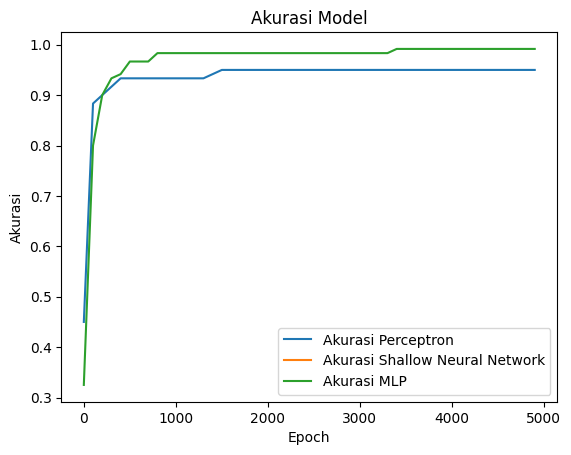

In [161]:
plt.plot(perceptron_epochs_logged, perceptron_acc, label='Akurasi Perceptron')
plt.plot(snn_epochs_logged, snn_acc_list, label='Akurasi Shallow Neural Network')
plt.plot(mlp_epochs_logged, mlp_acc_list, label='Akurasi MLP')

plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()